# Нелинейные уравнения и систесы нелинейных уравнений

In [91]:
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math, Markdown
import numpy as np
%matplotlib inline

In [92]:
epsilon = 0.00000001

def derivative(f, x, h=0.00005):
    return (f(x + h) - f(x - h)) / (2 * h)

## Нелинейные уравнения

Вариант з)
$$ 2 lg(x) - x / 2 + 1 = 0 $$

In [93]:
def solve_sim(f, f_i, x_0, epsilon):
    residual_list = []
    iterations = 0
    residual_list.append(abs(f(x_0)))
    while abs(f(x_0)) > epsilon:
        x_0 = f_i(x_0)
        iterations += 1
        residual_list.append(abs(f(x_0)))
    return x_0, iterations, residual_list

def solve_Newton(f, x, epsilon):
    residual_list = []
    iterations = 0
    residual_list.append(abs(f(x)))
    while abs(f(x)) > epsilon:
        x = x - f(x) / derivative(f, x)
        iterations += 1
        residual_list.append(abs(f(x)))
    return x, iterations, residual_list

def show_solution(x, f_x, iterations):
    f_x = str(f_x)
    f_x = f_x.replace('e', '\\cdot 10^{')
    f_x += "}"

    display(Markdown(f"Корень $x={x}$ найден за {iterations} итераций, $f(x)={f_x}$"))

# Нелинейные уравнения
## Решим уравнение, представленное ниже
$$ 2 lg(x) - x / 2 + 1 = 0 $$

### Решим уравнение методом простой итерации

<IPython.core.display.Math object>

Корень $x=4.681563795698658$ найден за 19 итераций, $f(x)=-6.059498236510308\cdot 10^{-09}$

<IPython.core.display.Math object>

Корень $x=0.3975449442201965$ найден за 13 итераций, $f(x)=-2.736808557557424\cdot 10^{-09}$

### Решим уравнение методом Ньютона

Корень $x=4.681563776434565$ найден за 4 итераций, $f(x)=-1.5947243525715749\cdot 10^{-12}$

Корень $x=0.39754494554450803$ найден за 8 итераций, $f(x)=-5.054994201003637\cdot 10^{-10}$

### Построим графики сходимости для всех корней и всех методов

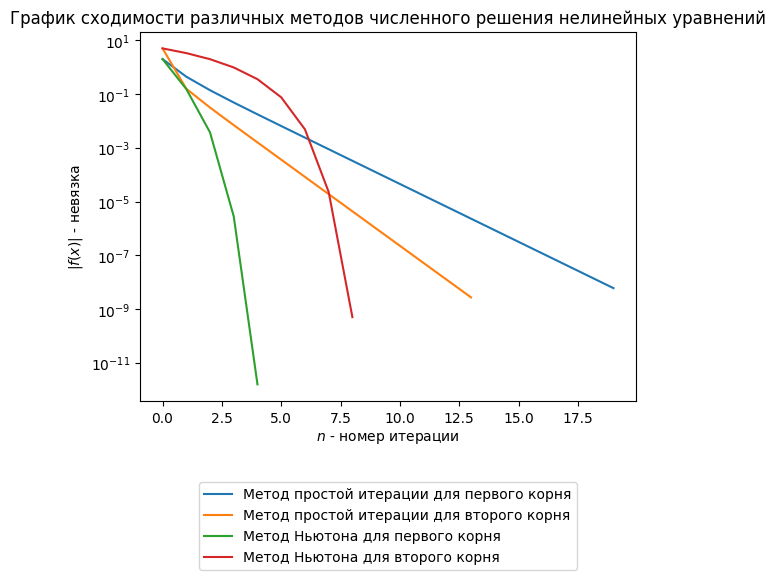

In [94]:
display(Markdown("""# Нелинейные уравнения
## Решим уравнение, представленное ниже
$$ 2 lg(x) - x / 2 + 1 = 0 $$"""))

def f(x):
    return 2 * math.log10(x) - x / 2 + 1

# Метод простой итерации
display(Markdown("### Решим уравнение методом простой итерации"))

################################################################

def f_1(x):
    return 4 * math.log10(x) + 2

x, iterations, residual_list_sim_0 = solve_sim(f, f_1, 10, epsilon)

display(Math(r"x_{i+1} = 4 \log(x) + 2"))
show_solution(x, f(x), iterations)

################################################################

def f_2(x):
    return math.pow(10, x / 4 - 1 / 2)

x, iterations, residual_list_sim_1 = solve_sim(f, f_2, 0.001, epsilon)

display(Math(r"x_{i+1} = 10^{x_i / 4 - 1 / 2}"))
show_solution(x, f(x), iterations)

################################################################

# Метод Ньютона
display(Markdown("### Решим уравнение методом Ньютона"))

################################################################

x, iterations, residual_list_newton_0 = solve_Newton(f, 10, epsilon)
show_solution(x, f(x), iterations)

################################################################

x, iterations, residual_list_newton_1 = solve_Newton(f, 0.001, epsilon)
show_solution(x, f(x), iterations)

################################################################

display(Markdown("### Построим графики сходимости для всех корней и всех методов"))

plt.plot(residual_list_sim_0,    label="Метод простой итерации для первого корня")
plt.plot(residual_list_sim_1,    label="Метод простой итерации для второго корня")
plt.plot(residual_list_newton_0, label="Метод Ньютона для первого корня")
plt.plot(residual_list_newton_1, label="Метод Ньютона для второго корня")

plt.yscale("log")
plt.xlabel("$n$ - номер итерации")
plt.ylabel("$|f(x)|$ - невязка")
plt.title(f"График сходимости различных методов численного решения нелинейных уравнений")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))

plt.show()

################################################################


# Системы нелинейных уравнений

Вариант IV.12.6 а)

\begin{equation}
    \begin{cases}
        \sin(x + 1) - y = 1.2 \\
        2x + \cos(y) = 2
    \end{cases}\
\end{equation}


In [95]:

def solve_linear_system(A, f):
    A_1 =np.array([
        np.array([A[1][1], -A[0][1]]),
        np.array([-A[1][0], A[0][0]]),
    ])
    
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    
    A_1 /= det
    
    return A_1 @ f


def derivative(f, x, i, j, h=0.00005):
    x_1 = np.copy(x)
    x_1[j] += h
    x_2 = np.copy(x) 
    x_2[j] -= h
    return (f(x_1)[i] - f(x_2))[i] / (2 * h)

In [96]:
def solve_sim(f, f_i, x_0, epsilon):
    residual_list = []
    iterations = 0
    residual_list.append(np.sum(abs(f(x_0))))
    while np.sum(abs(f(x_0))) > epsilon:
        x_0 = f_i(x_0)
        iterations += 1
        residual_list.append(np.sum(abs(f(x_0))))
    return x_0, iterations, residual_list

def solve_Newton(f, x, epsilon): 
    residual_list = []   
    iterations = 0
    residual_list.append(np.sum(abs(f(x))))
    while np.sum(np.abs(f(x))) > epsilon:
        J = np.array([[0.0] * 2] * 2)

        for i in range(2):
            for j in range(2):
                J[i][j] = derivative(f, x, i, j)

        x = x + solve_linear_system(J, -f(x))
                
        iterations += 1
        residual_list.append(np.sum(abs(f(x))))
    return x, iterations, residual_list

def show_solution(x, f_x, iterations):
    f_x_s = [""] * len(f_x)
    for i in range(len(f_x)):
        f_x_s[i] = str(f_x[i])
        if "e" in f_x_s[i]:
            f_x_s[i] = f_x_s[i].replace('e', '\\cdot 10^{')
            f_x_s[i] += "}"
    
    display(Markdown(f"Корень $x = \\begin{{bmatrix}} {x[0]} \\\\ {x[1]} \\end{{bmatrix}}$ найден за {iterations} итераций, $f(x)=\\begin{{bmatrix}} {f_x_s[0]} \\\\ {f_x_s[1]} \\end{{bmatrix}}$"))

# Системы нелинейных уравнений

## Решим систему уравнений, представленную ниже

<IPython.core.display.Math object>

### Преобразуем систему уравнений

<IPython.core.display.Math object>

### Решим систему методом простой итерации

<IPython.core.display.Math object>

Корень $x = \begin{bmatrix} 0.5101501534701 \\ -0.20183841520694945 \end{bmatrix}$ найден за 8 итераций, $f(x)=\begin{bmatrix} -3.908871004654202\cdot 10^{-10} \\ -7.931284962126028\cdot 10^{-09} \end{bmatrix}$

### Решим систему уравнений методом Ньютона

Корень $x = \begin{bmatrix} 0.510150157444577 \\ -0.20183841535681687 \end{bmatrix}$ найден за 4 итераций, $f(x)=\begin{bmatrix} -1.3078427230084344\cdot 10^{-13} \\ -1.237476787707692\cdot 10^{-11} \end{bmatrix}$

### Построим графики сходимости для всех методов

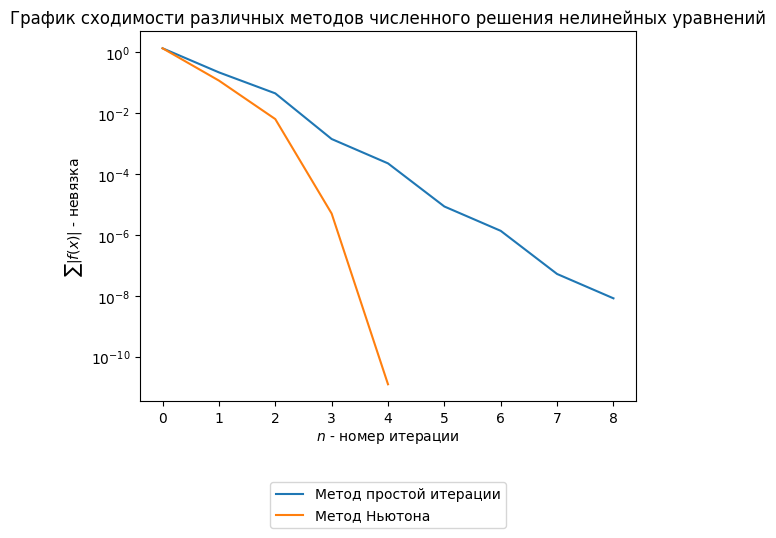

In [97]:
display(Markdown("# Системы нелинейных уравнений"))
display(Markdown("## Решим систему уравнений, представленную ниже"))
display(Math(r"""\begin{equation}
    \begin{cases}
        \sin(x + 1) - y = 1.2 \\
        2x + \cos(y) = 2
    \end{cases}\
\end{equation}"""))
display(Markdown("### Преобразуем систему уравнений"))
display(Math(r"""\begin{equation}
    \begin{cases}
        \sin(x + 1) - y - 1.2 = 0 \\
        2x + \cos(y) - 2 = 0
    \end{cases}\
\end{equation}"""))

def f(x):
    return np.array([
        np.sin(x[0] + 1) - x[1] - 1.2,
        2 * x[0] + np.cos(x[1]) - 2,
    ])

# Метод простой итерации
display(Markdown("### Решим систему методом простой итерации"))

################################################################

def f_1(x):
    return np.array([
        1 - np.cos(x[1]) / 2,
        np.sin(x[0] + 1) - 1.2,
    ])

x, iterations, residual_list_sim = solve_sim(f, f_1, np.array([0.0, 0.0]), epsilon)

display(Math(r"""\begin{equation}
    \begin{cases}
        x_{i+1} = 1 - \cos(y_i) / 2 \\
        y_{i+1} = \sin(x_i + 1) - 1.2
    \end{cases}\
\end{equation}"""))
show_solution(x, f(x), iterations)

################################################################

# Метод Ньютона
display(Markdown("### Решим систему уравнений методом Ньютона"))

################################################################

x, iterations, residual_list_newton = solve_Newton(f, np.array([0.0, 0.0]), epsilon)
show_solution(x, f(x), iterations)

################################################################

################################################################

display(Markdown("### Построим графики сходимости для всех методов"))

plt.plot(residual_list_sim,    label="Метод простой итерации")
plt.plot(residual_list_newton, label="Метод Ньютона")

plt.yscale("log")
plt.xlabel("$n$ - номер итерации")
plt.ylabel("$\sum |f(x)|$ - невязка")
plt.title(f"График сходимости различных методов численного решения нелинейных уравнений")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))

plt.show()

################################################################
